In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from datetime import datetime

In [3]:
df = pd.read_csv('/Users/valentinaospinahernandez/downloads/Motor_Vehicle_Collisions_Crashes.csv')

/var/folders/ky/bbkdw40n5xz_t2tq9j69_g140000gn/T/ipykernel_1342/1223725309.py:1: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/valentinaospinahernandez/downloads/Motor_Vehicle_Collisions_Crashes.csv')


In [4]:
df.head(6)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,Sedan,NaN,NaN,NaN,NaN
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,Sedan,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,NaN,NaN,NaN,NaN,NaN
5,04/14/2021,12:47,NaN,NaN,NaN,NaN,NaN,MAJOR DEEGAN EXPRESSWAY RAMP,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4407458,Dump,Sedan,NaN,NaN,NaN


In [5]:
df.shape

(1979623, 29)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1979623 entries, 0 to 1979622
Data columns (total 29 columns):
 #   Column                         Dtype  
---  ------                         -----  
 0   CRASH DATE                     object 
 1   CRASH TIME                     object 
 2   BOROUGH                        object 
 3   ZIP CODE                       object 
 4   LATITUDE                       float64
 5   LONGITUDE                      float64
 6   LOCATION                       object 
 7   ON STREET NAME                 object 
 8   CROSS STREET NAME              object 
 9   OFF STREET NAME                object 
 10  NUMBER OF PERSONS INJURED      float64
 11  NUMBER OF PERSONS KILLED       float64
 12  NUMBER OF PEDESTRIANS INJURED  int64  
 13  NUMBER OF PEDESTRIANS KILLED   int64  
 14  NUMBER OF CYCLIST INJURED      int64  
 15  NUMBER OF CYCLIST KILLED       int64  
 16  NUMBER OF MOTORIST INJURED     int64  
 17  NUMBER OF MOTORIST KILLED      int64  
 18  CO

In [7]:
df.isnull().sum()/df.shape[0]

CRASH DATE                       0.000000
CRASH TIME                       0.000000
BOROUGH                          0.310924
ZIP CODE                         0.311045
LATITUDE                         0.114469
LONGITUDE                        0.114469
LOCATION                         0.114469
ON STREET NAME                   0.209049
CROSS STREET NAME                0.371461
OFF STREET NAME                  0.837612
NUMBER OF PERSONS INJURED        0.000009
NUMBER OF PERSONS KILLED         0.000016
NUMBER OF PEDESTRIANS INJURED    0.000000
NUMBER OF PEDESTRIANS KILLED     0.000000
NUMBER OF CYCLIST INJURED        0.000000
NUMBER OF CYCLIST KILLED         0.000000
NUMBER OF MOTORIST INJURED       0.000000
NUMBER OF MOTORIST KILLED        0.000000
CONTRIBUTING FACTOR VEHICLE 1    0.003099
CONTRIBUTING FACTOR VEHICLE 2    0.151302
CONTRIBUTING FACTOR VEHICLE 3    0.929541
CONTRIBUTING FACTOR VEHICLE 4    0.984256
CONTRIBUTING FACTOR VEHICLE 5    0.995762
COLLISION_ID                     0

## Limpieza de Datos y Data Wrangling

### Crear columnas 'injured' (número de heridos) y 'deaths_number' (número de fallecidos)

In [8]:
col_heridos = ['NUMBER OF PERSONS INJURED', 'NUMBER OF PEDESTRIANS INJURED', 'NUMBER OF CYCLIST INJURED', 'NUMBER OF MOTORIST INJURED']

df.loc[:,col_heridos].sum()

NUMBER OF PERSONS INJURED        588302.0
NUMBER OF PEDESTRIANS INJURED    108191.0
NUMBER OF CYCLIST INJURED         50462.0
NUMBER OF MOTORIST INJURED       424432.0
dtype: float64

In [9]:
col_deaths = ['NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST KILLED']

df.loc[:,col_deaths].sum()

NUMBER OF PERSONS KILLED        2812.0
NUMBER OF PEDESTRIANS KILLED    1427.0
NUMBER OF CYCLIST KILLED         212.0
NUMBER OF MOTORIST KILLED       1137.0
dtype: float64

In [10]:
# Función para determinar número de heridos
def heridos(row):
    if row[col_heridos].sum() > 0:
        return row[col_heridos].sum()
    else:
        return 0

# Creamos columna 'injured' aplicando la función a todas las filas del dataset
df['injured'] = df.apply(heridos, axis=1)

print(df.columns)

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'ON STREET NAME', 'CROSS STREET NAME',
       'OFF STREET NAME', 'NUMBER OF PERSONS INJURED',
       'NUMBER OF PERSONS KILLED', 'NUMBER OF PEDESTRIANS INJURED',
       'NUMBER OF PEDESTRIANS KILLED', 'NUMBER OF CYCLIST INJURED',
       'NUMBER OF CYCLIST KILLED', 'NUMBER OF MOTORIST INJURED',
       'NUMBER OF MOTORIST KILLED', 'CONTRIBUTING FACTOR VEHICLE 1',
       'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3',
       'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5',
       'COLLISION_ID', 'VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2',
       'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5',
       'injured'],
      dtype='object')


In [11]:
# Función para determinar número de fallecidos
def deaths(row):
    if row[col_deaths].sum() > 0:
        return row[col_deaths].sum()
    else:
        return 0

# Creamos columna 'deaths' aplicando la función a todas las filas del dataset
df['deaths_number'] = df.apply(deaths, axis=1)

In [12]:
df.injured=df.injured.astype(int)
df.deaths_number=df.deaths_number.astype(int)

In [13]:
df = df.drop(columns=col_deaths+col_heridos)

In [14]:
df.sample(5)

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,injured,deaths_number
814654,09/14/2017,9:00,NaN,NaN,40.758316,-73.941460,"(40.758316, -73.94146)",38 AVENUE,NaN,NaN,...,NaN,NaN,3750563,Box Truck,Sedan,NaN,NaN,NaN,0,0
1671144,09/23/2013,15:10,MANHATTAN,10034,40.863020,-73.917557,"(40.8630205, -73.9175569)",9 AVENUE,WEST 206 STREET,NaN,...,NaN,NaN,71882,SPORT UTILITY / STATION WAGON,UNKNOWN,NaN,NaN,NaN,0,0
691247,03/20/2018,9:46,NaN,NaN,40.665916,-73.925470,"(40.665916, -73.92547)",BUFFALO AVENUE,NaN,NaN,...,NaN,NaN,3867081,Sedan,Sedan,NaN,NaN,NaN,0,0
869023,06/28/2017,20:20,BROOKLYN,11234.0,40.611220,-73.920300,"(40.61122, -73.9203)",NaN,NaN,5400 AVENUE U,...,NaN,NaN,3702249,Station Wagon/Sport Utility Vehicle,Sedan,NaN,NaN,NaN,0,0
1358043,03/24/2015,8:15,NaN,NaN,40.855123,-73.872209,"(40.8551235, -73.8722091)",NaN,NaN,NaN,...,NaN,NaN,3191359,PASSENGER VEHICLE,PASSENGER VEHICLE,NaN,NaN,NaN,0,0


### Creación de variable target 'deaths'

In [15]:
def deaths_yes_no(row):
    if row['deaths_number'] > 0:
        return 1
    else:
        return 0

In [16]:
df['deaths'] = df.apply(deaths_yes_no, axis=1)

In [17]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,VEHICLE TYPE CODE 1,VEHICLE TYPE CODE 2,VEHICLE TYPE CODE 3,VEHICLE TYPE CODE 4,VEHICLE TYPE CODE 5,injured,deaths_number,deaths
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,NaN,4455765,Sedan,Sedan,NaN,NaN,NaN,4,0,0
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,4513547,Sedan,NaN,NaN,NaN,NaN,2,0,0
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,NaN,4541903,Sedan,Pick-up Truck,NaN,NaN,NaN,0,0,0
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,4456314,Sedan,NaN,NaN,NaN,NaN,0,0,0
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,4486609,NaN,NaN,NaN,NaN,NaN,0,0,0


### Crear columna 'vehiculo'

In [18]:
ve_types = df['VEHICLE TYPE CODE 1'].unique()
ve_types.shape

(1495,)

In [19]:
df['VEHICLE TYPE CODE 1'].value_counts()[:20]

Sedan                                  533047
Station Wagon/Sport Utility Vehicle    420386
PASSENGER VEHICLE                      416206
SPORT UTILITY / STATION WAGON          180291
Taxi                                    48942
4 dr sedan                              40145
Pick-up Truck                           32520
TAXI                                    31911
VAN                                     25266
OTHER                                   22967
Box Truck                               22794
UNKNOWN                                 19936
Bus                                     19719
LARGE COM VEH(6 OR MORE TIRES)          14397
BUS                                     13993
SMALL COM VEH(4 TIRES)                  13216
Bike                                    13159
PICK-UP TRUCK                           11505
LIVERY VEHICLE                          10481
Tractor Truck Diesel                     9735
Name: VEHICLE TYPE CODE 1, dtype: int64

In [20]:
tipos_ve = ['SUV', 'Automóvil', 'Taxi', 'Bus', 'Vehículo comercial grande', 'Bicicleta', 'Camioneta', 'Van', 'NaN', 'Otro']

In [21]:
dic_veh = {
'SUV':['Station Wagon/Sport Utility Vehicle', 'SPORT UTILITY / STATION WAGON'],
'Automóvil':['PASSENGER VEHICLE ', '4 dr sedan','Sedan'],
'Taxi':'TAXI',
'Bus':['Bus', 'BUS'],
'Vehículo comercial grande':['LARGE COM VEH(6 OR MORE TIRES)', 'Tractor Truck Diesel'],
'Bicicleta':['Bike', 'BIKE'],
'Camioneta':['Pick-up Truck', 'Box Truck', 'PICK-UP TRUCK', 'LIVERY VEHICLE'],
'Van':['VAN', 'Van'],
'Moto':['Motorcycle'],
'NaN':['UNKNOWN', 'Unknown', 'else'],
'Otro':['OTHER', 'Other']
}

In [22]:
def asignar(vehiculo):
    if vehiculo in ['Station Wagon/Sport Utility Vehicle', 'SPORT UTILITY / STATION WAGON']:
        return 'SUV'
    elif vehiculo in ['PASSENGER VEHICLE ', '4 dr sedan','Sedan']:
        return 'Passenger vehicle'
    elif vehiculo in ['TAXI', 'Taxi']:
        return 'Taxi'
    elif vehiculo in ['Bus', 'BUS']:
        return 'Bus'
    elif vehiculo in ['LARGE COM VEH(6 OR MORE TIRES)', 'Tractor Truck Diesel']:
        return 'Large commercial vehicle'
    elif vehiculo in ['Bike', 'BIKE']:
        return 'Bike'
    elif vehiculo in ['Pick-up Truck', 'Box Truck', 'PICK-UP TRUCK', 'LIVERY VEHICLE']:
        return 'Truck'
    elif vehiculo in ['VAN', 'Van']:
        return 'Van'
    elif vehiculo in ['Motorcycle']:
        return 'Motorcycle'
    elif vehiculo in ['OTHER', 'Other']:
        return 'Other'
    else:
        return np.NaN
    

In [23]:
df['VEHICLE TYPE CODE 1']=df['VEHICLE TYPE CODE 1'].str.strip()

In [24]:
df['vehicle']=df['VEHICLE TYPE CODE 1'].apply(asignar)

In [25]:
df = df.drop(columns=['VEHICLE TYPE CODE 1', 'VEHICLE TYPE CODE 2', 'VEHICLE TYPE CODE 3', 'VEHICLE TYPE CODE 4', 'VEHICLE TYPE CODE 5'])

In [26]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,CONTRIBUTING FACTOR VEHICLE 1,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,injured,deaths_number,deaths,vehicle
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,Aggressive Driving/Road Rage,Unspecified,NaN,NaN,NaN,4455765,4,0,0,Passenger vehicle
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,Pavement Slippery,NaN,NaN,NaN,NaN,4513547,2,0,0,Passenger vehicle
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,Following Too Closely,Unspecified,NaN,NaN,NaN,4541903,0,0,0,Passenger vehicle
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,Unspecified,NaN,NaN,NaN,NaN,4456314,0,0,0,Passenger vehicle
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,NaN,NaN,NaN,NaN,NaN,4486609,0,0,0,NaN


In [27]:
df.vehicle.value_counts()

SUV                         600677
Passenger vehicle           573192
Taxi                         80853
Truck                        77300
Bus                          33712
Van                          33693
Large commercial vehicle     24132
Other                        22968
Bike                         13159
Motorcycle                    7145
Name: vehicle, dtype: int64

In [28]:
df.vehicle.shape

(1979623,)

In [29]:
df.vehicle.isnull().sum()/df.vehicle.shape[0]  # Alrededor del 26% de los valores de 'vehicle' son nulos

0.25903517993072417

### Crear columna 'main _contributing_factor'

In [30]:
import pandas as pd
import numpy as np

# Crear una lista de las columnas de "CONTRIBUTING FACTOR" de los 5 vehículos
cf_cols = ['CONTRIBUTING FACTOR VEHICLE {}'.format(i) for i in range(1,6)]

# Función que recibe una fila y devuelve el contributing factor principal
def get_main_cf(row):
    cfs = row[cf_cols].values.tolist() # Lista con los CF de los 5 vehículos
    cfs_clean = [cf for cf in cfs if cf not in [np.nan, '', 'Unspecified']] # CF sin valores nulos o vacíos
    if len(cfs_clean) == 0: # Si todos los CF están en blanco o son Unspecified
        return 'NO DATA'
    if cfs_clean.count(cfs_clean[0]) == len(cfs_clean): # Si todos los CF son iguales
        if cfs_clean[0] == 'Unspecified': # Si el CF es Unspecified
            if 'Unspecified' in [cf for cf in cfs if cf != cfs_clean[0]] or all([cf in [np.nan, ''] for cf in cfs if cf != cfs_clean[0]]): # Si los demás CF también son Unspecified o están en blanco
                return 'Unspecified'
        else:
            return cfs_clean[0]
    else: # Si hay CF diferentes
        cfs_counts = {cf: cfs_clean.count(cf) for cf in set(cfs_clean)} # Diccionario con la cuenta de cada CF
        cfs_counts_sorted = sorted(cfs_counts.items(), key=lambda x: x[1], reverse=True) # Lista de tuplas (CF, cuenta) ordenada por cuenta
        if cfs_counts_sorted[0][0] == 'Unspecified': # Si el CF más común es Unspecified
            return 'Unspecified'
        else:
            return cfs_counts_sorted[0][0]

# Crear una nueva columna con el CF principal de cada fila
df['main _contributing_factor'] = df.apply(get_main_cf, axis=1)

In [31]:
df.rename(columns={'main _contributing_factor':'main_contributing_factor'}, inplace=True)

In [32]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,CONTRIBUTING FACTOR VEHICLE 2,CONTRIBUTING FACTOR VEHICLE 3,CONTRIBUTING FACTOR VEHICLE 4,CONTRIBUTING FACTOR VEHICLE 5,COLLISION_ID,injured,deaths_number,deaths,vehicle,main_contributing_factor
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,Unspecified,NaN,NaN,NaN,4455765,4,0,0,Passenger vehicle,Aggressive Driving/Road Rage
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,NaN,NaN,NaN,NaN,4513547,2,0,0,Passenger vehicle,Pavement Slippery
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,Unspecified,NaN,NaN,NaN,4541903,0,0,0,Passenger vehicle,Following Too Closely
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,NaN,NaN,NaN,NaN,4456314,0,0,0,Passenger vehicle,NO DATA
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,NaN,NaN,NaN,NaN,4486609,0,0,0,NaN,NO DATA


In [33]:
df['main_contributing_factor'].value_counts()

NO DATA                           689813
Driver Inattention/Distraction    388238
Failure to Yield Right-of-Way     121517
Following Too Closely             114966
Backing Unsafely                   73248
                                   ...  
Windshield Inadequate                 80
Cell Phone (hand-held)                72
Texting                               48
Listening/Using Headphones            24
1                                     14
Name: main_contributing_factor, Length: 61, dtype: int64

In [34]:
df['main_contributing_factor'].value_counts()[1:25].sum()/df.shape[0]

0.6246063013008032

In [35]:
df.main_contributing_factor.isnull().sum()/df.shape[0]

0.0

In [36]:
df.main_contributing_factor.replace(['NO DATA', '80', '1', 'nan', np.nan], np.NaN, inplace=True)
df.main_contributing_factor.replace(['Cell Phone (hand-Held)', 'Texting', 'Cell Phone (hand-held)', 'Cell Phone (hands-free)'], 'Cell Phone', inplace=True)
df.main_contributing_factor.replace(['Drugs (Illegal)', 'Drugs (illegal)'], 'Drugs (Illegal)', inplace=True)
df.main_contributing_factor.replace('Illnes', 'Illness', inplace=True)
df.main_contributing_factor.replace('Other Vehicular','Other', inplace=True)

In [37]:
b = df.main_contributing_factor.value_counts()[16:]
least_factor_list = list(b.index)
least_factor_list

['Reaction to Uninvolved Vehicle',
 'Prescription Medication',
 'Outside Car Distraction',
 'Oversized Vehicle',
 'View Obstructed/Limited',
 'Pedestrian/Bicyclist/Other Pedestrian Error/Confusion',
 'Aggressive Driving/Road Rage',
 'Physical Disability',
 'Passenger Distraction',
 'Brakes Defective',
 'Fell Asleep',
 'Illness',
 'Glare',
 'Obstruction/Debris',
 'Failure to Keep Right',
 'Steering Failure',
 'Pavement Defective',
 'Tire Failure/Inadequate',
 'Other Electronic Device',
 'Reaction to Other Uninvolved Vehicle',
 'Animals Action',
 'Driverless/Runaway Vehicle',
 'Drugs (Illegal)',
 'Lane Marking Improper/Inadequate',
 'Accelerator Defective',
 'Cell Phone',
 'Traffic Control Device Improper/Non-Working',
 'Tow Hitch Defective',
 'Other Lighting Defects',
 'Headlights Defective',
 'Tinted Windows',
 'Using On Board Navigation Device',
 'Eating or Drinking',
 'Vehicle Vandalism',
 'Shoulders Defective/Improper',
 'Windshield Inadequate',
 'Listening/Using Headphones']

In [38]:
df.main_contributing_factor.replace(least_factor_list, 'Other', inplace=True)

In [39]:
df = df.drop(columns=['CONTRIBUTING FACTOR VEHICLE 1', 'CONTRIBUTING FACTOR VEHICLE 2', 'CONTRIBUTING FACTOR VEHICLE 3', 'CONTRIBUTING FACTOR VEHICLE 4', 'CONTRIBUTING FACTOR VEHICLE 5'])

### Creación de columna "road_type"

In [40]:
avenue=df["ON STREET NAME"].str.contains("avenue|ave", case=False)
avenue=avenue.rename("avenue")

In [41]:
street=df["ON STREET NAME"].str.contains("street", case=False)
street=street.rename("street")

In [42]:
way=df["ON STREET NAME"].str.contains("expressway|highway|parkway", case=False)
way=way.rename("way")

In [43]:
road=df["ON STREET NAME"].str.contains("road", case=False)
road=road.rename("road")

In [44]:
boulevard=df["ON STREET NAME"].str.contains("boulevard", case=False)
boulevard=boulevard.rename("boulevard")

In [45]:
# unir cada serie al dataframe
df = df.merge(right=avenue, how="left", right_index=True, left_index=True)
df = df.merge(right=street, how="left", right_index=True, left_index=True)
df = df.merge(right=way, how="left", right_index=True, left_index=True)
df = df.merge(right=road, how="left", right_index=True, left_index=True)
df = df.merge(right=boulevard, how="left", right_index=True, left_index=True)

In [46]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,ON STREET NAME,CROSS STREET NAME,OFF STREET NAME,...,injured,deaths_number,deaths,vehicle,main_contributing_factor,avenue,street,way,road,boulevard
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,WHITESTONE EXPRESSWAY,20 AVENUE,NaN,...,4,0,0,Passenger vehicle,Other,False,False,True,False,False
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,QUEENSBORO BRIDGE UPPER,NaN,NaN,...,2,0,0,Passenger vehicle,Pavement Slippery,False,False,False,False,False
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,THROGS NECK BRIDGE,NaN,NaN,...,0,0,0,Passenger vehicle,Following Too Closely,False,False,False,False,False
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",NaN,NaN,1211 LORING AVENUE,...,0,0,0,Passenger vehicle,NaN,NaN,NaN,NaN,NaN,NaN
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",SARATOGA AVENUE,DECATUR STREET,NaN,...,0,0,0,NaN,NaN,True,False,False,False,False


In [47]:
def f(row):
    if row["avenue"] == True:
        val = "avenue"
    elif row["road"] == True:
        val = "road"
    elif row["street"]== True:
        val= "street"
    elif row["way"]== True:
        val= "way"
    elif row["boulevard"]== True:
        val= "boulevard"
    else:
        val = math.nan
    return val

In [48]:
df["road_type"] = df.apply(f, axis=1)

In [49]:
df.drop(columns=["avenue", "street", "way", "road","boulevard"], inplace= True)
df.drop(columns=["ON STREET NAME", "CROSS STREET NAME", "OFF STREET NAME"], inplace= True)

In [50]:
df.road_type.value_counts()

avenue       592617
street       500085
way          136744
boulevard    116427
road          87992
Name: road_type, dtype: int64

In [51]:
df.road_type.isnull().sum()/df.shape[0]

0.27568784561504894

In [52]:
df.columns

Index(['CRASH DATE', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'COLLISION_ID', 'injured', 'deaths_number',
       'deaths', 'vehicle', 'main_contributing_factor', 'road_type'],
      dtype='object')

### Creación de columna 'time_of_day' con momento del dia del choque

In [53]:
df["crash_datetime"] = df["CRASH TIME"].apply(pd.to_datetime)
df["crash_time"]=df["crash_datetime"].dt.time
df.drop(columns="crash_datetime", inplace=True)

In [54]:
# creo las mascaras booleanas para determinar aquellos choques que ocurrieron durante el dia y los almaceno en la columna "horario_diurno"
from datetime import time
hora_tope= time(18, 0, 0)
hora_base=time(6, 0, 0)
df["horario_diurno"]=(df["crash_time"]<hora_tope) & (df["crash_time"]>=hora_base)

In [55]:
df["horario_diurno"].replace({True: "day", False: "night"}, inplace=True)
df.rename(columns={"horario_diurno": "time_of_day"}, inplace=True)

In [56]:
df.head()

,CRASH DATE,CRASH TIME,BOROUGH,ZIP CODE,LATITUDE,LONGITUDE,LOCATION,COLLISION_ID,injured,deaths_number,deaths,vehicle,main_contributing_factor,road_type,crash_time,time_of_day
0,09/11/2021,2:39,NaN,NaN,NaN,NaN,NaN,4455765,4,0,0,Passenger vehicle,Other,way,02:39:00,night
1,03/26/2022,11:45,NaN,NaN,NaN,NaN,NaN,4513547,2,0,0,Passenger vehicle,Pavement Slippery,NaN,11:45:00,day
2,06/29/2022,6:55,NaN,NaN,NaN,NaN,NaN,4541903,0,0,0,Passenger vehicle,Following Too Closely,NaN,06:55:00,day
3,09/11/2021,9:35,BROOKLYN,11208.0,40.667202,-73.866500,"(40.667202, -73.8665)",4456314,0,0,0,Passenger vehicle,NaN,NaN,09:35:00,day
4,12/14/2021,8:13,BROOKLYN,11233.0,40.683304,-73.917274,"(40.683304, -73.917274)",4486609,0,0,0,NaN,NaN,avenue,08:13:00,day


In [57]:
df.time_of_day.value_counts()

day      1283806
night     695817
Name: time_of_day, dtype: int64

### Creación de columna 'weekday': día de la semana del accidente

In [58]:
# Se convierte la columna 'crash date' a objetos datetime
df['CRASH DATE'] = pd.to_datetime(df['CRASH DATE'], format='%m/%d/%Y')

# Se agrega una columna que contenga el nombre del día de la semana
df['weekday'] = df['CRASH DATE'].apply(lambda x: x.strftime('%A'))

### Creación de columna 'season': estación del año en que ocurrió el accidente

In [59]:
# Se agrega una columna que contenga la estación del año
def get_season(month):
    if month >= 3 and month <= 5:
        return 'Spring'
    elif month >= 6 and month <= 8:
        return 'Summer'
    elif month >= 9 and month <= 11:
        return 'Fall'
    else:
        return 'Winter'

In [60]:
df['season'] = df['CRASH DATE'].dt.month.apply(get_season)

In [61]:
df.rename(columns={'CRASH DATE':'crash_date'}, inplace=True)

### Limpieza: últimos toques y Dataset final

In [62]:
df.columns

Index(['crash_date', 'CRASH TIME', 'BOROUGH', 'ZIP CODE', 'LATITUDE',
       'LONGITUDE', 'LOCATION', 'COLLISION_ID', 'injured', 'deaths_number',
       'deaths', 'vehicle', 'main_contributing_factor', 'road_type',
       'crash_time', 'time_of_day', 'weekday', 'season'],
      dtype='object')

In [63]:
df.columns = df.columns.str.lower()

In [64]:
df.shape

(1979623, 18)

In [65]:
df.drop_duplicates(inplace=True)

In [66]:
df.head(4)

,crash_date,crash time,borough,zip code,latitude,longitude,location,collision_id,injured,deaths_number,deaths,vehicle,main_contributing_factor,road_type,crash_time,time_of_day,weekday,season
0,2021-09-11,2:39,NaN,NaN,NaN,NaN,NaN,4455765,4,0,0,Passenger vehicle,Other,way,02:39:00,night,Saturday,Fall
1,2022-03-26,11:45,NaN,NaN,NaN,NaN,NaN,4513547,2,0,0,Passenger vehicle,Pavement Slippery,NaN,11:45:00,day,Saturday,Spring
2,2022-06-29,6:55,NaN,NaN,NaN,NaN,NaN,4541903,0,0,0,Passenger vehicle,Following Too Closely,NaN,06:55:00,day,Wednesday,Summer
3,2021-09-11,9:35,BROOKLYN,11208.0,40.667202,-73.8665,"(40.667202, -73.8665)",4456314,0,0,0,Passenger vehicle,NaN,NaN,09:35:00,day,Saturday,Fall


In [67]:
df.drop(columns=['crash time'], inplace=True)
df.dropna(inplace=True)

In [68]:
df.reset_index(inplace=True)

In [69]:
df.drop(columns='index', inplace=True)

In [70]:
df.shape

(438927, 17)

In [71]:
df.isnull().sum()/df.shape[0]

crash_date                  0.0
borough                     0.0
zip code                    0.0
latitude                    0.0
longitude                   0.0
location                    0.0
collision_id                0.0
injured                     0.0
deaths_number               0.0
deaths                      0.0
vehicle                     0.0
main_contributing_factor    0.0
road_type                   0.0
crash_time                  0.0
time_of_day                 0.0
weekday                     0.0
season                      0.0
dtype: float64

In [72]:
col = df.pop('deaths')
df.insert(df.shape[1], 'deaths', col)

In [73]:
df.head(5)

,crash_date,borough,zip code,latitude,longitude,location,collision_id,injured,deaths_number,vehicle,main_contributing_factor,road_type,crash_time,time_of_day,weekday,season,deaths
0,2021-12-14,MANHATTAN,10017.0,40.751440,-73.973970,"(40.75144, -73.97397)",4486519,0,0,Passenger vehicle,Passing Too Closely,avenue,14:58:00,day,Tuesday,Winter,0
1,2021-12-14,QUEENS,11413.0,40.675884,-73.755770,"(40.675884, -73.75577)",4487127,0,0,Passenger vehicle,Turning Improperly,boulevard,16:50:00,day,Tuesday,Winter,0
2,2021-12-14,QUEENS,11434.0,40.666840,-73.789410,"(40.66684, -73.78941)",4486635,4,0,Passenger vehicle,Other,avenue,23:10:00,night,Tuesday,Winter,0
3,2021-12-14,BROOKLYN,11211.0,40.710957,-73.951126,"(40.710957, -73.951126)",4486556,2,0,Bus,Passing or Lane Usage Improper,street,17:15:00,day,Tuesday,Winter,0
4,2022-04-24,BRONX,10466.0,40.894810,-73.861830,"(40.89481, -73.86183)",4521633,0,0,Passenger vehicle,Driver Inattention/Distraction,way,17:45:00,day,Sunday,Spring,0


### Numero de accidentes por día de la semana

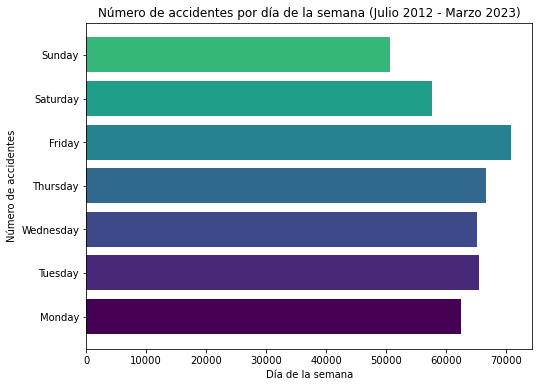

In [94]:
# Se cuenta el número de accidentes por día de la semana
accidents_by_day = df['weekday'].value_counts()

# Se ordenan los días de la semana de lunes a domingo
accidents_by_day = accidents_by_day.reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

# Se crea un gráfico de barras

plt.figure(figsize=(8, 6))
plt.barh(accidents_by_day.index, accidents_by_day.values, color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Número de accidentes por día de la semana (Julio 2012 - Marzo 2023)')
plt.xlabel('Día de la semana')
plt.ylabel('Número de accidentes')
plt.show()

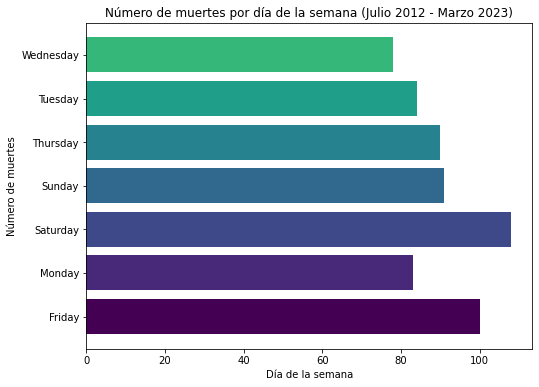

In [96]:
# Se agrupa los datos por día de la semana y calcula la suma de muertes para cada día
deaths_by_day = df.groupby('weekday')['deaths'].sum()

# Se crea un gráfico de barras
plt.figure(figsize=(8, 6))
plt.barh(deaths_by_day.index, deaths_by_day.values,color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Número de muertes por día de la semana (Julio 2012 - Marzo 2023)')
plt.xlabel('Día de la semana')
plt.ylabel('Número de muertes')
plt.show()

Si bien en el analisis de accidentes por los dias de la semana encontramos que el dia con mayor accidentes es el viernes, sin embargo el mayor numero de muertes se dan el Sabado.

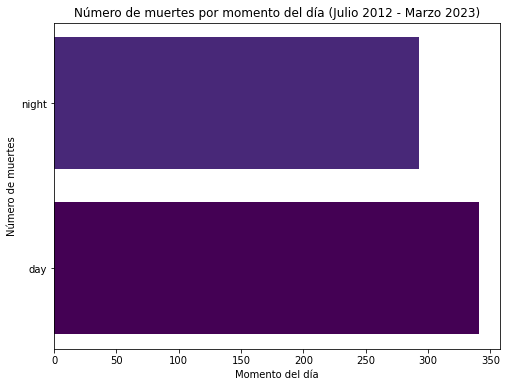

In [98]:
# Se grupa los datos por momento del día (de día o de noche) y calcula la suma de muertes para cada momento
deaths_by_time = df.groupby('time_of_day')['deaths'].sum()

plt.figure(figsize=(8, 6))
plt.barh(deaths_by_time.index, deaths_by_time.values, color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Número de muertes por momento del día (Julio 2012 - Marzo 2023)')
plt.xlabel('Momento del día')
plt.ylabel('Número de muertes')
plt.show()

El mayor numero de muertes sucede en el dia

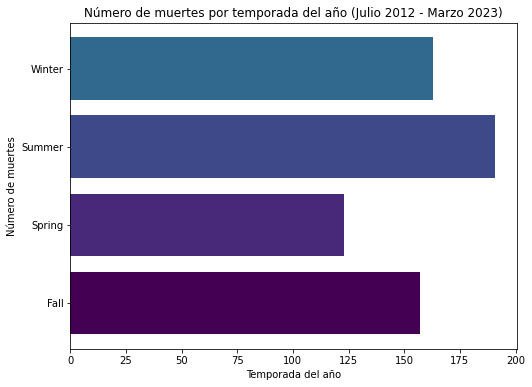

In [99]:
# Se grupa los datos por la temporada  y calcula la suma de muertes para cada momento
deaths_by_time = df.groupby('season')['deaths'].sum()

plt.figure(figsize=(8, 6))
plt.barh(deaths_by_time.index, deaths_by_time.values, color=plt.cm.viridis(np.linspace(0, 1, 10)))
plt.title('Número de muertes por temporada del año (Julio 2012 - Marzo 2023)')
plt.xlabel('Temporada del año')
plt.ylabel('Número de muertes')
plt.show()

El mayor numero de muertes sucede en el verano

In [ ]:
# Crear un nuevo DataFrame con la hora del accidente y el número de muertes
hour_deaths = df[['crash_time', 'deaths']]
hour_deaths['crash_time'] = hour_deaths['crash_time'].str.slice(0,2) # Extraer la hora del accidente
hour_deaths = hour_deaths.groupby('crash_time').sum()

# Graficar el histograma
plt.hist(hour_deaths.index, weights=hour_deaths['deaths'], bins=24)
plt.title('Distribución de muertes por hora del día')
plt.xlabel('Hora del día')
plt.ylabel('Número de muertes')
plt.show()

## Regresión logistica 

In [ ]:
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from scipy.stats import loguniform
from sklearn.model_selection import StratifiedKFold


In [ ]:
df.deaths.value_counts()

0    438292
1       634
Name: deaths, dtype: int64

In [ ]:
columns_to_keep = ['borough', 'deaths', 'vehicle', 'main_contributing_factor', 'road_type', 'time_of_day','weekday','season']


In [ ]:
df_model = df.loc[:, columns_to_keep]


### Train test stratificado por la variable target (deaths)

In [ ]:
# Train test split
X_train,X_test,y_train,y_test=train_test_split(df_model.drop(['deaths'],axis=1),\
                                               df_model['deaths'],stratify=df_model['deaths'],random_state=0)

print('Tamaño del training set:')
print(X_train.shape)

print('\nBalance de clases:')
print(y_train.value_counts(normalize=False))


print('\nBalance de clases norm:')
print(y_train.value_counts(normalize=True))

print('\nRatio entre las clases:')
print((y_train==1).sum()/(y_train==0).sum())

Tamaño del training set:
(329194, 7)

Balance de clases:
0    328719
1       475
Name: deaths, dtype: int64

Balance de clases norm:
0    0.998557
1    0.001443
Name: deaths, dtype: float64

Ratio entre las clases:
0.0014450031790069937


### Undersampling

In [ ]:
undersampler = RandomUnderSampler(sampling_strategy=0.8)
X_train_us,y_train_us = undersampler.fit_resample(df_model.drop('deaths', axis=1), df_model['deaths'])

print('Balance de clases:')
print(y_train_us.value_counts(normalize=False))

print('\nBalance de clases norm:')
print(y_train_us.value_counts(normalize=True))

print('\nRatio entre las clases:')
print((y_train_us==1).sum()/(y_train_us==0).sum())

print('\nTamaño de Xtrain:')
print(X_train_us.shape)

Balance de clases:
0    792
1    634
Name: deaths, dtype: int64

Balance de clases norm:
0    0.5554
1    0.4446
Name: deaths, dtype: float64

Ratio entre las clases:
0.8005050505050505

Tamaño de Xtrain:
(1426, 7)


### Modelo de RL

In [ ]:

logreg = LogisticRegression()
logreg.fit(X_train_us, y_train_us)
y_pred = logreg.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))



Accuracy: 0.8182025297998761
Precision: 0.0028637459807073955
Recall: 0.3584905660377358
F1 Score: 0.005682101380650949


### Modelo RL + Bagging

In [ ]:

logreg = LogisticRegression()
bagging = BaggingClassifier(base_estimator=logreg, n_estimators=10)
bagging.fit(X_train_us, y_train_us)
y_pred = bagging.predict(X_test)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,roc_auc_score

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))
print("AUC:",roc_auc_score(y_test, y_pred))


/Users/valentinaospinahernandez/opt/anaconda3/lib/python3.9/site-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Accuracy: 0.8067473480844238
Precision: 0.0027876210725253955
Recall: 0.3710691823899371
F1 Score: 0.005533670981054211
AUC: 0.5892243687861635


Confusion matrix

 [[88467 21106]
 [  100    59]]


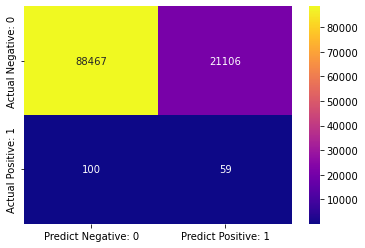

In [ ]:
conf_mat = confusion_matrix(y_test, y_pred)
print('Confusion matrix\n\n', conf_mat)

conf_mat_df = pd.DataFrame(data=conf_mat, 
                           index=['Actual Negative: 0', 'Actual Positive: 1'], 
                           columns=['Predict Negative: 0', 'Predict Positive: 1'])

sns.heatmap(conf_mat_df, annot=True, fmt='d', cmap='plasma');